<a href="https://colab.research.google.com/github/Sajish06/task8/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-learn pandas matplotlib seaborn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (8,6)
sns.set(style="whitegrid")

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Uploaded file:', fn)

Saving Mall_Customers.csv to Mall_Customers.csv
Uploaded file: Mall_Customers.csv


In [3]:
DATA_PATH = 'Mall_Customers.csv'

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
display(df.head())
display(df.describe(include='all'))

Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [4]:
print("Columns:", df.columns.tolist())

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns detected:", numeric_cols)

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for c in features:
    if c not in df.columns:
        raise Exception(f"Column '{c}' not found. Adjust `features` variable to match your CSV columns.")

X = df[features].copy()
X.head()

Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Numeric columns detected: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
print("Missing values per column:\n", X.isna().sum())

X = X.dropna().reset_index(drop=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Missing values per column:
 Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio (2 components):", pca.explained_variance_ratio_)

Explained variance ratio (2 components): [0.44266167 0.33308378]


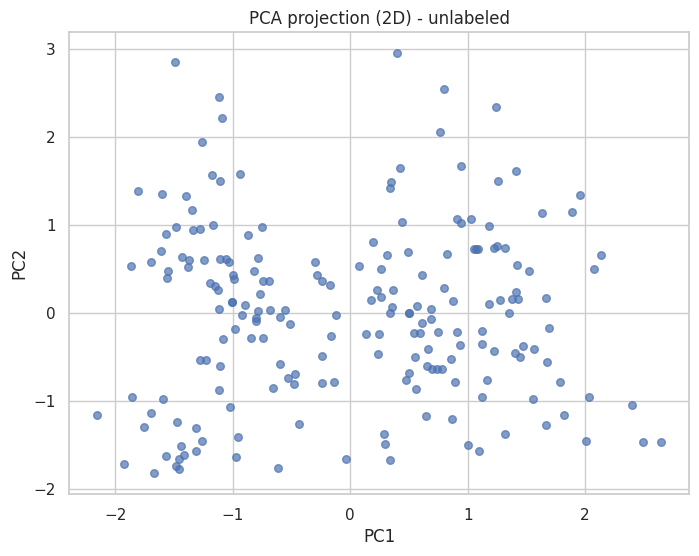

In [8]:
plt.scatter(X_pca[:,0], X_pca[:,1], s=30, alpha=0.7)
plt.title("PCA projection (2D) - unlabeled")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

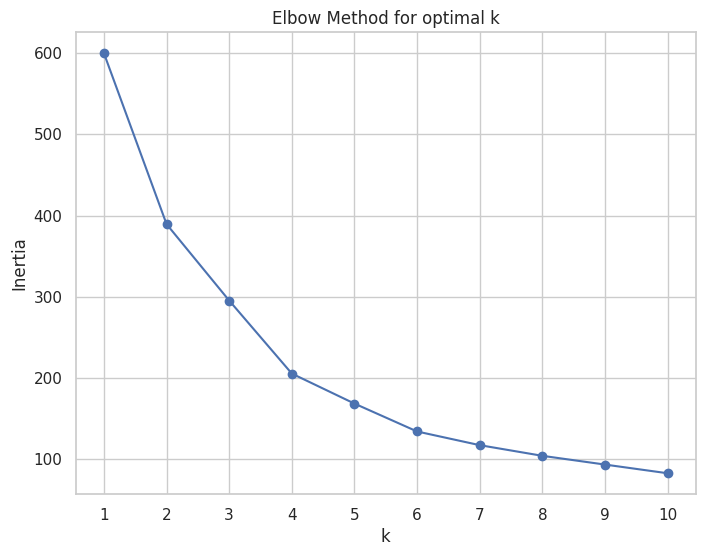

In [9]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal k')
plt.xticks(K_range)
plt.show()

k=2, silhouette=0.3355
k=3, silhouette=0.3578
k=4, silhouette=0.4040
k=5, silhouette=0.4166
k=6, silhouette=0.4284
k=7, silhouette=0.4172
k=8, silhouette=0.4082
k=9, silhouette=0.4177
k=10, silhouette=0.4066


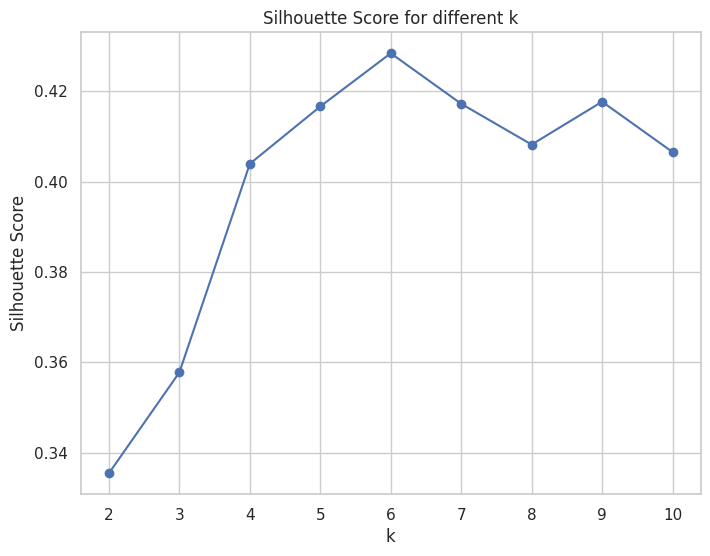

In [10]:
sil_scores = []
K_range2 = range(2, 11)
for k in K_range2:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"k={k}, silhouette={sil:.4f}")

plt.plot(list(K_range2), sil_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k')
plt.show()

In [11]:
K_FINAL = 5
km_final = KMeans(n_clusters=K_FINAL, random_state=42, n_init=20)
labels = km_final.fit_predict(X_scaled)

df_clusters = df.copy()
df_clusters = df_clusters.loc[X.index].reset_index(drop=True)
df_clusters['cluster'] = labels
display(df_clusters.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


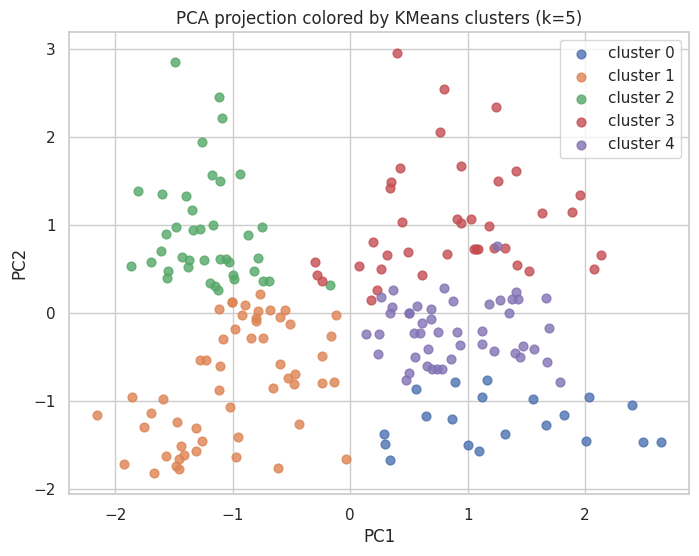

In [12]:
plt.figure(figsize=(8,6))
for c in np.unique(labels):
    mask = labels == c
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=40, label=f'cluster {c}', alpha=0.8)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'PCA projection colored by KMeans clusters (k={K_FINAL})')
plt.show()

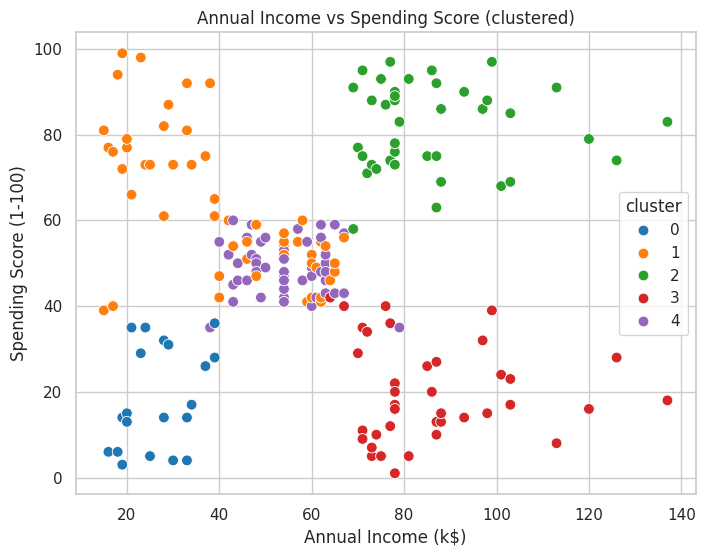

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clusters, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10', s=60)
plt.title('Annual Income vs Spending Score (clustered)')
plt.show()

In [14]:
centers_scaled = km_final.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_original, columns=features)
centers_df['cluster'] = range(K_FINAL)
display(centers_df)

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,46.250000,26.750000,18.350000,0
1,25.185185,41.092593,62.240741,1
2,32.875000,86.100000,81.525000,2
3,39.871795,86.102564,19.358974,3
4,55.638298,54.382979,48.851064,4


In [15]:
inertia_final = km_final.inertia_
sil_final = silhouette_score(X_scaled, labels)

print(f"Final inertia: {inertia_final:.2f}")
print(f"Final silhouette score: {sil_final:.4f}")

print("Cluster counts:")
print(pd.Series(labels).value_counts().sort_index())

Final inertia: 168.25
Final silhouette score: 0.4166
Cluster counts:
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64
